5. For the given problem, construct a Bayesian Network and general-purpose decision tree.
Compare results. What differences do you observe? Explain.
Predict the probability that children would be playing outdoors given weather
conditions.

In [1]:
!pip install pgmpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.8 MB/s eta 0:00:00


In [4]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pgmpy.inference import VariableElimination
from IPython.display import display

# Load the weather data into a DataFrame
data = {
    'X1': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'X2': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'X3': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'X4': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Y': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}
df = pd.DataFrame(data)

# Bayesian Network
bn_model = BayesianNetwork([('X2', 'X1'), ('X3', 'X1'),('X2', 'X3'),('X4', 'X1'),('X1', 'Y'), ('X2', 'Y'), ('X3', 'Y'), ('X4', 'Y')])
bn_model.fit(df, estimator=MaximumLikelihoodEstimator)
bn_inference = VariableElimination(bn_model)

# Decision Tree
X = df.drop(columns=['Y'])
y = df['Y']
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(pd.get_dummies(X), y)

# Predict using Bayesian Network
predict_data = df.drop(columns=['Y'])

bayesian_predictions = {}
for index, row in predict_data.iterrows():
    query = bn_inference.map_query(variables=['Y'], evidence=dict(row))
    bayesian_predictions[index] = query['Y']

# Predict using Decision Tree
dt_predictions = dt_classifier.predict(pd.get_dummies(predict_data))

# Combine predictions into a DataFrame
predictions_df = pd.DataFrame({
    'X1': df['X1'],
    'X2': df['X2'],
    'X3': df['X3'],
    'X4': df['X4'],
    'Y (Bayesian Network)': bayesian_predictions.values(),
    'Y (Decision Tree)': dt_predictions
})

# Print the table
print(predictions_df.to_string(index=False))


0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

      X1   X2     X3    X4 Y (Bayesian Network) Y (Decision Tree)
   Sunny  Hot   High False                   No                No
   Sunny  Hot   High  True                   No                No
Overcast  Hot   High False                  Yes               Yes
   Rainy Mild   High False                  Yes               Yes
   Rainy Cool Normal False                  Yes               Yes
   Rainy Cool Normal  True                   No                No
Overcast Cool Normal  True                  Yes               Yes
   Sunny Mild   High False                   No                No
   Sunny Cool Normal False                  Yes               Yes
   Rainy Mild Normal False                  Yes               Yes
   Sunny Mild Normal  True                  Yes               Yes
Overcast Mild   High  True                  Yes               Yes
Overcast  Hot Normal False                  Yes               Yes
   Rainy Mild   High  True                   No                No


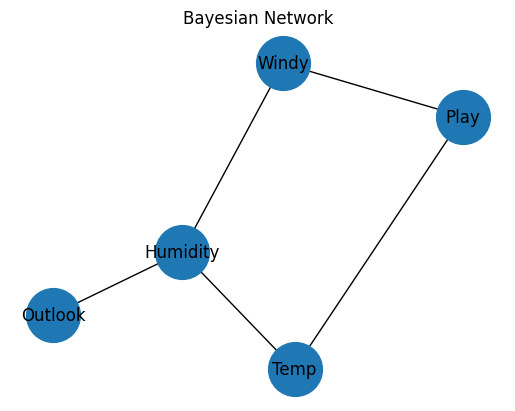

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Creating a directed graph
graph = nx.DiGraph()

# Adding nodes
graph.add_node('Outlook')
graph.add_node('Temp')
graph.add_node('Humidity')
graph.add_node('Windy')
graph.add_node('Play')

# Adding edges
graph.add_edge('Outlook', 'Humidity')
graph.add_edge('Humidity', 'Temp')
graph.add_edge('Humidity', 'Windy')
graph.add_edge('Temp', 'Play')
graph.add_edge('Windy', 'Play')

pos = nx.spring_layout(graph)

# Drawing nodes and edges
nx.draw_networkx_nodes(graph, pos, node_size=1500)
nx.draw_networkx_labels(graph, pos)
nx.draw_networkx_edges(graph, pos, edge_color='black', arrows=True)

# Showing the graph
plt.title("Bayesian Network")
plt.axis('off')
plt.show()


Probem 4

In [7]:
import pandas as pd
from pgmpy.models import BayesianNetwork as BN
from pgmpy.estimators import MaximumLikelihoodEstimator as MLE
from pgmpy.inference import VariableElimination as VE

input_data = {
    'A': ['T', 'T', 'T', 'T', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F'],
    'B': ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'T', 'T', 'T', 'T', 'F', 'F', 'F', 'F'],
    'C': ['T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F', 'T', 'T', 'F', 'F'],
    'D': ['T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F', 'T', 'F'],
    'Result': [0.0448, 0.0252, 0.0112, 0.0588, 0.0144, 0.0144, 0.0096, 0.0216,
               0.1024, 0.0576, 0.0256, 0.1344, 0.1152, 0.1152, 0.0768, 0.1728]
}
data_frame = pd.DataFrame(input_data)

bayesian_model = BN([('A', 'Result'), ('B', 'Result'), ('C', 'Result'), ('D', 'Result')])

estimator = MLE(bayesian_model, data_frame)

cpds = estimator.get_parameters()

for cpd in cpds:
    bayesian_model.add_cpds(cpd)

inference = VE(bayesian_model)

def check_independence(var1, var2, given=None):
    evidence = {}
    if given:
        evidence[given] = data_frame[given].iloc[0]
    if evidence:
        independence_query = inference.query(variables=[var1, var2], evidence=evidence)
    else:
        independence_query = inference.query(variables=[var1, var2])
    print(f"{var1} and {var2} are independent:", (independence_query.values.flatten()[0] == independence_query.values.flatten()).all())

print("a. Are A and B independent?")
check_independence('A', 'B')

print("b. Are A and C independent?")
check_independence('A', 'C')

print("c. Are A and C independent given B?")
check_independence('A', 'C', given='B')

print("d. Are A and D independent?")
check_independence('A', 'D')

print("e. Are A and D independent given C?")
check_independence('A', 'D', given='C')


a. Are A and B independent?
A and B are independent: True
b. Are A and C independent?
A and C are independent: True
c. Are A and C independent given B?
A and C are independent: True
d. Are A and D independent?
A and D are independent: True
e. Are A and D independent given C?
A and D are independent: True
